---
title: 'COVID-19 Analysis & Visualization'
author: 'Hyunsoo Kim'
date: '2022-06-07'
categories: [Python, Pandas, Numpy]
image: covid.png
jupyter: python3
page-layout: full
---

> COVID-19 Analysis & Visualization

### 서론 <a class="anchor" id="chapter1"></a>

#### 분석 배경 및 목적 <a class="anchor" id="section_1_1"></a>

##### 분석 배경 <a class="anchor" id="section_1_1_1"></a>

`분석 배경` - 2022년 6월 현재 코로나의 상황은 매일 10000명의 확진자가 나오고 있는 상황이지만 코로나가 처음 발병하고 나서와는 조금은 다른 반응이다. 최근 정부에서는 집단 면역이 90% 이상 형성이 되어있으며 확진자의 추세 또한 감소세를 보이고 있는 상황에서 2020년 01월부터 2020년 06월까지 수집된 해당 데이터를 기반으로 과연 과거와 현재의 차이는 얼마나 있고 당시 정부와 뉴스에서 주장하던 코로나에 대한 정보는 과연 타당하였고 올바른 정보였는지 궁금하여 해당 주제를 선정하여 분석을 진행하게 되었습니다.

##### 분석 목적 <a class="anchor" id="section_1_1_2"></a>

`분석 목적` - 자료를 제공한 데이콘에서는 해당 자료들은 이용해서 다음과 같은 인공지능 AI를 활용 코로나 확산 방지와 예방을 위한 인사이트 / 시각화 발굴. 이라는 목적을 가지고 진행을 하였습니다. 해서 저는 당시 기간동안 가장 많이 확진된 연령층과 주된 감염 원인과 그 이유에 대해서 알아보고, 어떤 연령층에게 가장 치명적인 질병이었느지와 당시 정부의 방역 대책은 타당하였는지 에 대해서 목적을 가지고 해당 분석을 진행하였습니다.



#### 데이터 소개 <a class="anchor" id="section_1_2"></a>

#### 데이터 카테고리 <a class="anchor" id="section_1_2_1"></a>

1) Case Data

- Case: 한국의 COVID-19 감염 사례 데이터

2) Patient Data

- PatientInfo: 한국의 코로나19 환자 역학 데이터
- PatientRoute: 국내 코로나19 환자 경로 데이터

3) Time Series Data

- Time: 한국의 코로나19 상태의 시계열 데이터
- TimeAge: 한국의 연령별 코로나19 현황 시계열 데이터
- TimeGender: 한국의 성별에 따른 코로나19 현황의 시계열 데이터
- TimeProvince: 한국의 지역별 코로나19 현황 시계열 데이터

4) Additional Data

- Region: 대한민국 내 지역의 위치 및 통계 자료
- Weather: 한국 지역의 날씨 데이터
- SearchTrend: 국내 최대 포털사이트 네이버에서 검색된 키워드의 트렌드 데이터
- SeoulFloating: 대한민국 서울 유동인구 데이터(SK텔레콤 빅데이터 허브에서)
- Policy: 한국의 코로나19에 대한 정부 정책 데이터

#### 데이터 형태 <a class="anchor" id="section_1_2_2"></a>

- 색상이 의미하는 것은 비슷한 속성을 가지고 있다는 것입니다.
- 열 사이에 선이 연결되어 있다는 것은 열의 값이 부분적으로 공유됨을 의미합니다.
- 점선은 약한 관련성을 의미합니다.

<https://user-images.githubusercontent.com/50820635/86225695-8dca0580-bbc5-11ea-9e9b-b0ca33414d8a.PNG>

#### 데이터 세부 설명 <a class="anchor" id="section_1_2_3"></a>

In [69]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('../notebook/coronavirusdataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../notebook/coronavirusdataset\Case.csv
../notebook/coronavirusdataset\PatientInfo.csv
../notebook/coronavirusdataset\PatientRoute.csv
../notebook/coronavirusdataset\Policy.csv
../notebook/coronavirusdataset\Region.csv
../notebook/coronavirusdataset\SearchTrend.csv
../notebook/coronavirusdataset\SeoulFloating.csv
../notebook/coronavirusdataset\Time.csv
../notebook/coronavirusdataset\TimeAge.csv
../notebook/coronavirusdataset\TimeGender.csv
../notebook/coronavirusdataset\TimeProvince.csv
../notebook/coronavirusdataset\Weather.csv


In [70]:
path = '../notebook/coronavirusdataset/'

case = p_info = pd.read_csv(path+'Case.csv')
patientinfo = pd.read_csv(path+'PatientInfo.csv')
patientroute = pd.read_csv(path+'PatientRoute.csv')
time = pd.read_csv(path+'Time.csv')
timeage = pd.read_csv(path+'TimeAge.csv')
timegender = pd.read_csv(path+'TimeGender.csv')
timeprovince = pd.read_csv(path+'TimeProvince.csv')
region = pd.read_csv(path+'Region.csv')
weather = pd.read_csv(path+'Weather.csv')
searchtrend = pd.read_csv(path+'SearchTrend.csv')
seoulfloating = pd.read_csv(path+'SeoulFloating.csv')
policy = pd.read_csv(path+'Policy.csv')

1) Case

*한국의 COVID-19 감염 사례 데이터*

1. case_id: the ID of the infection case
  - case_id(7) = region_code(5) + case_number(2)
  - You can check the region_code in 'Region.csv'
- province: Special City / Metropolitan City / Province(-do)
- city: City(-si) / Country (-gun) / District (-gu)
  - The value 'from other city' means that where the group infection started is other city.
- group: TRUE: group infection / FALSE: not group
  - If the value is 'TRUE' in this column, the value of 'infection_cases' means the name of group.
  - The values named 'contact with patient', 'overseas inflow' and 'etc' are not group infection.
- infection_case: the infection case (the name of group or other cases)
  - The value 'overseas inflow' means that the infection is from other country.
  - The value 'etc' includes individual cases, cases where relevance classification is ongoing after investigation, and cases under investigation.
- confirmed: the accumulated number of the confirmed
- latitude: the latitude of the group (WGS84)
- longitude: the longitude of the group (WGS84)

In [71]:
case.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374


2) PatientInfo 

*한국의 코로나19 환자 역학 데이터*

1. patient_id: the ID of the patient
  - patient_id(10) = region_code(5) + patient_number(5)
  - You can check the region_code in 'Region.csv'
  - There are two types of the patient_number
    1) local_num: The number given by the local government.
    2) global_num: The number given by the KCDC
- sex: the sex of the patient
- age: the age of the patient
  - 0s: 0 ~ 9
  - 10s: 10 ~ 19
    ...
  - 90s: 90 ~ 99
  - 100s: 100 ~ 109
- country: the country of the patient
- province: the province of the patient
- city: the city of the patient
- infection_case: the case of infection
- infected_by: the ID of who infected the patient
  - This column refers to the 'patient_id' column.
- contact_number: the number of contacts with people
- symptom_onset_date: the date of symptom onset
- confirmed_date: the date of being confirmed
- released_date: the date of being released
- deceased_date: the date of being deceased
- state: isolated / released / deceased
  - isolated: being isolated in the hospital
  - released: being released from the hospital
  - deceased: being deceased

In [72]:
patientinfo.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


3) PatientRoute

*한국의 코로나19 환자 경로 데이터*

- patient_id: the ID of the patient
- date: YYYY-MM-DD
- province: Special City / Metropolitan City / Province(-do)
- city: City(-si) / Country (-gun) / District (-gu)
- latitude: the latitude of the visit (WGS84)
- longitude: the longitude of the visit (WGS84)

In [73]:
patientroute.head()

,patient_id,global_num,date,province,city,type,latitude,longitude
0,1000000001,2.0,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.615246,126.715632
1,1000000001,2.0,2020-01-24,Seoul,Jung-gu,hospital,37.567241,127.005659
2,1000000002,5.0,2020-01-25,Seoul,Seongbuk-gu,etc,37.592560,127.017048
3,1000000002,5.0,2020-01-26,Seoul,Seongbuk-gu,store,37.591810,127.016822
4,1000000002,5.0,2020-01-26,Seoul,Seongdong-gu,public_transportation,37.563992,127.029534


4) Time

*한국의 COVID-19 상태의 시계열 데이터*

- date: YYYY-MM-DD
- time: Time (0 = AM 12:00 / 16 = PM 04:00)
  - The time for KCDC to open the information has been changed from PM 04:00 to AM 12:00 since March 2nd.
- test: the accumulated number of tests
  - A test is a diagnosis of an infection.
- negative: the accumulated number of negative results
- confirmed: the accumulated number of positive results
- released: the accumulated number of releases
- deceased: the accumulated number of deceases

In [74]:
time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


5) TimeAge

*한국의 연령별 코로나19 현황 시계열 데이터*

- date: YYYY-MM-DD
  - The status in terms of the age has been presented since March 2nd.
- time: Time
- age: the age of patients
- confirmed: the accumulated number of the confirmed
- deceased: the accumulated number of the deceased


In [75]:
timeage.head()

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


6) TimeGender

*한국의 성별에 따른 COVID-19 현황의 시계열 데이터*

- date: YYYY-MM-DD
  - The status in terms of the gender has been presented since March 2nd.
- time: Time
- sex: the gender of patients
- confirmed: the accumulated number of the confirmed
- deceased: the accumulated number of the deceased

In [76]:
timegender.head()

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20


7) TimeProvince

*한국의 지역별 코로나19 현황 시계열 데이터*

- date: YYYY-MM-DD
- time: Time
- province: the province of South Korea
- confirmed: the accumulated number of the confirmed in the province
  - The confirmed status in terms of the provinces has been presented since Feburary 21th.
  - The value before Feburary 21th can be different.
- released: the accumulated number of the released in the province
  - The confirmed status in terms of the provinces has been presented since March 5th.
  -The value before March 5th can be different.
- deceased: the accumulated number of the deceased in the province
  - The confirmed status in terms of the provinces has been presented since March 5th.
  - The value before March 5th can be different.

In [77]:
timeprovince.head()

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0


8) Region

*대한민국 내 지역의 위치 및 통계 자료*

- code: the code of the region
- province: Special City / Metropolitan City / Province(-do)
- city: City(-si) / Country (-gun) / District (-gu)
- latitude: the latitude of the visit (WGS84)
- longitude: the longitude of the visit (WGS84)
- elementary_school_count: the number of elementary schools
- kindergarten_count: the number of kindergartens
- university_count: the number of universities
- academy_ratio: the ratio of academies
- elderly_population_ratio: the ratio of the elderly population
- elderly_alone_ratio: the ratio of elderly households living alone
- nursing_home_count: the number of nursing homes

Source of the statistic: KOSTAT (Statistics Korea)

In [78]:
region.head()

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080


9) Weather

*한국 지역의 날씨 데이터*

- code: the code of the region
- province: Special City / Metropolitan City / Province(-do)
- date: YYYY-MM-DD
- avg_temp: the average temperature
- min_temp: the lowest temperature
- max_temp: the highest temperature
- precipitation: the daily precipitation
- max_wind_speed: the maximum wind speed
- most_wind_direction: the most frequent wind direction
- avg_relative_humidity: the average relative humidity

Source of the weather data: KMA (Korea Meteorological Administration)



In [79]:
weather.head()

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,180.0,83.9


10) SearchTrend

*국내 최대 포털인 네이버에서 검색된 키워드의 트렌드 데이터*

- date: YYYY-MM-DD
- cold: the search volume of 'cold' in Korean language
  - The unit means relative value by setting the highest search volume in the period to 100.
- flu: the search volume of 'flu' in Korean language
  - Same as above.
- pneumonia: the search volume of 'pneumonia' in Korean language
  -Same as above.
- coronavirus: the search volume of 'coronavirus' in Korean language
  -Same as above.
  
Source of the data: NAVER DataLab

In [80]:
searchtrend.head()

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381


11) SeoulFloating

*대한민국 서울 유동인구 데이터(SK텔레콤 빅데이터 허브에서)*

- date: YYYY-MM-DD
- hour: Hour
- birth_year: the birth year of the floating population
- sext: he sex of the floating population
- province: Special City / Metropolitan City / Province(-do)
- city: City(-si) / Country (-gun) / District (-gu)
- fp_num: the number of floating population

Source of the data: SKT Big Data Hub

In [81]:
seoulfloating.head()

,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
3,2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
4,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880


12) Policy

*한국의 COVID-19에 대한 정부 정책 데이터*

- policy_id: the ID of the policy
- country: the country that implemented the policy
- type: the type of the policy
- gov_policy: the policy of the government
- detail: the detail of the policy
- start_date: the start date of the policy
- end_date: the end date of the policy

In [82]:
policy.head()

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN


### 본론 <a class="anchor" id="chapter2"></a>

#### 주제1 - 어떤 연령층이 가장 많이 확진되었는가? <a class="anchor" id="section_2_1"></a>

##### 주제1 - EDA <a class="anchor" id="section_2_1_1"></a>

In [83]:
# import packages - 사용할 패키지 불러오기
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot as plt
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [84]:
time.head() #time 데이터의 상위 5개를 확인

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [85]:
#시간의 흐름에 따른 확진자 추이
fig = go.Figure() #빈 도화지를 만든다는 개념

fig.add_trace(go.Scatter(x=time['date'], y=time['confirmed'],
                    mode='lines', 
                    name='확진(confirmed)')) 
                    #Scatter 형태의 플랏으로 x축은 time데이터의 date컬럼을 사용하고 y축은 time데이터의 confirmed 컬럼을 사용하고 표현 방법은 line이며 선의 이름은 확진으로 지정

fig.update_layout(title='시간의 흐름에 따른 확진자 추이',
                   xaxis_title='Date',
                   yaxis_title='Number') #그래프의 제목과 x축 y축의 이름을 지정

fig.show() #그래프를 출력해서 보이도록

해당 그래프를 보면 시간의 흐름에 따른 누적 확진자의 수를 나타낸것으로 20년 3월부터 가파른 경사를 보이면서 우상향해서 증가하는 추세를 보이고 있습니다

In [86]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=time['date'], y=time['confirmed'],
                    mode='lines', 
                    name='확진(confirmed)'))

fig.add_trace(go.Scatter(x=time['date'], y=time['released'],
                    mode='lines', 
                    name='해제(released)'))
                    
fig.add_trace(go.Scatter(x=time['date'], y=time['deceased'],
                    mode='lines', 
                    name='사망(deceased)'))

fig.update_layout(title='시간의 흐름에 따른 코로나의 추이',
                   xaxis_title='Date',
                   yaxis_title='Number')

fig.show()

다음 그래프는 시간의 흐름에 따른 코로나의 추이로 확진자와 격리해제자의 추이와 사망자의 추이에 대해서 보여주고 있으며 확진자와 격리해제자의 추이는 유사하게 우상향하는 모습을 보여주고 있으며 사망자는 확진자와 격리자의 수에 비해서는 적어서 눈에 보이는 변화는 없습니다.

In [87]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=time['date'], y=time['confirmed'],
                    mode='lines', 
                    name='확진(confirmed)'))

fig.add_trace(go.Scatter(x=time['date'],y=time['negative'],
             mode='lines', name='음성(Negative)'))

fig.add_trace(go.Scatter(x=time['date'],y=time['test'],
             mode='markers', name='검사(Test)'))

fig.update_layout(title='시간의 흐름에 따른 코로나의 검사 추이',
                   xaxis_title='Date',
                   yaxis_title='Number')

fig.show()

해당 그래프는 시간의 흐름에 따른 코로나의 검사 추이로 검사수와 음성의 수가 거의 붙어서 우상향하는 모습이고 확진자는 이에 비해 변동이 없어 보이는 모습입니다. 이를 통해 검사를 많이 했지만 이에 비해서 확진이 된 정도는 상당히 적음을 알 수 있습니다.

In [132]:
fig = go.Figure()
fig.add_trace(go.Bar(x=time['date'],y=time['confirmed'].diff(), 
                     name='confirmed', marker_color='rgba(152, 0, 0, .8)'))

fig.update_layout(title='일단위 확진자 수',
                   xaxis_title='Date',
                   yaxis_title='Number')

fig.show()

다음은 일단위 확진자의 수를 보여주고 있습니다. 20년 3월 인근에서 800여명 까지 일일 확진되는 모습을 보이고 점차 감소하는 모습을 보이는 형태입니다

##### 주제1 - 연령대별 확진 비율 <a class="anchor" id="section_2_1_2"></a>

In [89]:
display(timeage.head()) #timeage 데이터셋의 기본적인 형태를 파악하기 위해 상위 5개의 행만 추출
display(timeage.age.unique()) #timeage 데이터셋에서 age 컬럼에서 어떤 연령층이 있는지 unique 함수를 통해서 추출

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


array(['0s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s'],
      dtype=object)

In [90]:
age_list = timeage.age.unique()
age_list #앞에서 설명한 연령대를 따로 추출하여 age_list라는 곳에 할당을 시킴 

array(['0s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s'],
      dtype=object)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



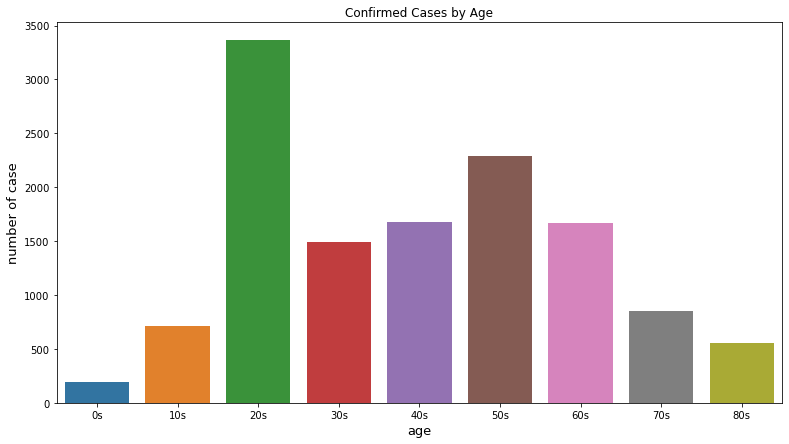

In [91]:
fig, ax = plt.subplots(figsize = (13,7)) #도화지(Figure : fig)를 깔고 그래프를 그릴 구역(Axes : ax)을 정의합니다. figsize를 통해서 도화지의 크기를 지정해준다
#이는 objection oriented API으로 그래프의 각 부분을 객체로 지정하고 그리는 유형이다
sns.barplot(age_list,timeage.confirmed[-9:])
ax.set_xlabel('age',size=13) #연령
ax.set_ylabel('number of case',size=13) #케이스의 횟수
plt.title('Confirmed Cases by Age')
plt.show()

연령대별로 분석을 해본결과 20대가 압도적으로 많은 수를 차지하고 있는 형태의 플랏을 볼 수가 있다

2020년 연령대별 인구

- <https://kosis.kr/visual/populationKorea/experienceYard/populationPyramid.do?mb=N&menuId=M_3_2>

해당 자료를 이용해서 인구수와 확진 비율을 확인하여 과연 20대가 인구수가 많아서 이렇게 많이 확진이 되었는가에 대해서 알아본다

In [92]:
age_order = pd.DataFrame() #빈 데이터 프레임을 생성
age_order['age']  = age_list #앞서 생성한 age_list를 새로 만드는 데이터 프레임에 age라는 이름의 컬럼으로 할당
age_order['population'] = [4054901, 4769187, 7037893, 7174782, 8257903, 8575336, 6476602, 3598811, 1657942] #population이라는 컬럼에 통계청 홈페이지에서 확인한 값을 입력
age_order['proportion'] = round(age_order['population']/sum(age_order['population'])*100,2) 
#인구 비율을 구하기 위해 모든 인구수를 더하고 각 연령별로 나누고 소수점으로 나오는것을 방지하기 위해 100을 곱하고 소수점 2번째 자리까지 표현이 되도록 설정
age_order = age_order.sort_values('age') #age를 기준으로 재정렬
age_order.set_index(np.arange(1,10),inplace=True) #인덱스의 설정을 1~10순으로 들어가도록 설정하고 본래 있던것은 대체해서 사용하도록
age_order

,age,population,proportion
1,0s,4054901,7.86
2,10s,4769187,9.24
3,20s,7037893,13.64
4,30s,7174782,13.90
5,40s,8257903,16.00
6,50s,8575336,16.62
7,60s,6476602,12.55
8,70s,3598811,6.97
9,80s,1657942,3.21


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



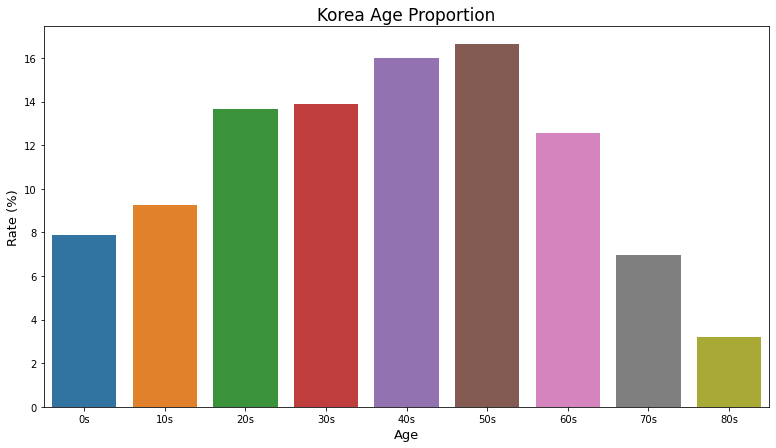

In [93]:
fig, ax = plt.subplots(figsize=(13, 7)) 
plt.title('Korea Age Proportion', fontsize=17)
sns.barplot(age_list, age_order.proportion[-9:])
ax.set_xlabel('Age', size=13)
ax.set_ylabel('Rate (%)', size=13)
plt.show() 
#한국의 2020년 연령별 인구의 수를 나타낸 표이다 

예상과는 다르게 20대가 가장 많은 인구수를 가지고 있는 연령대가 아닌 40,50대가 가장 인구수가 많은 연령대임을 알 수 있다. 이로 20대 인구수가 다른 연령층에 비해 많기 때문에 확진이 많이 된것은 아니다.

In [94]:
confirmed_by_population = age_order.sort_values('age') #'age'라는 컬럼으로 정렬
confirmed_by_population['confirmed'] = list(timeage[-9:].confirmed) #confirmed라는 컬럼을 만들고 timeage의 해당 리스트를 할당 시킴


confirmed_by_population['confirmed_ratio'] = confirmed_by_population['confirmed']/confirmed_by_population['population'] *100 #인구비율에 따른 확진 비율 컬럼 추가
display(confirmed_by_population)

,age,population,proportion,confirmed,confirmed_ratio
1,0s,4054901,7.86,193,0.004760
2,10s,4769187,9.24,708,0.014845
3,20s,7037893,13.64,3362,0.047770
4,30s,7174782,13.90,1496,0.020851
5,40s,8257903,16.00,1681,0.020356
6,50s,8575336,16.62,2286,0.026658
7,60s,6476602,12.55,1668,0.025754
8,70s,3598811,6.97,850,0.023619
9,80s,1657942,3.21,556,0.033536


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



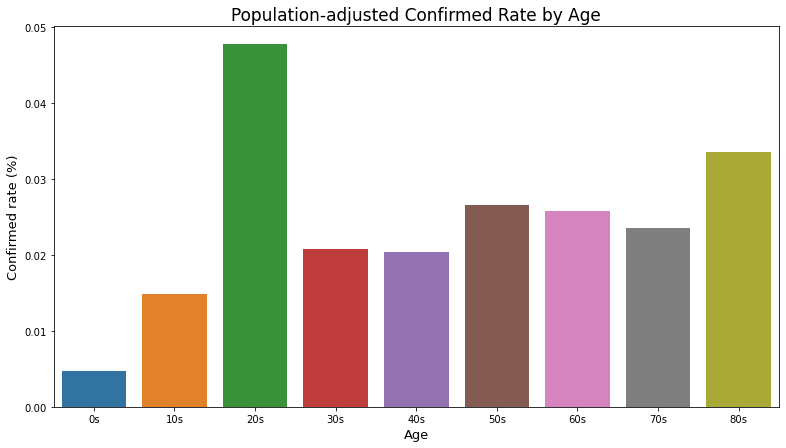

In [95]:
## 3. Plot confirmed rate by age
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Population-adjusted Confirmed Rate by Age', fontsize=17)
sns.barplot(age_list, confirmed_by_population.confirmed_ratio[-9:])
ax.set_xlabel('Age', size=13)
ax.set_ylabel('Confirmed rate (%)', size=13)
plt.show() #인구 비율에 따른 확진 확률

인구 비율에 따른 확진자의 수를 보아도 20대가 인구수가 많은 연령대인 40,50대 보다도 확연하게 많은 것을 알 수 있으며 오히려 80대 이상의 연령대가 차지하는 비율이 증가하였다.

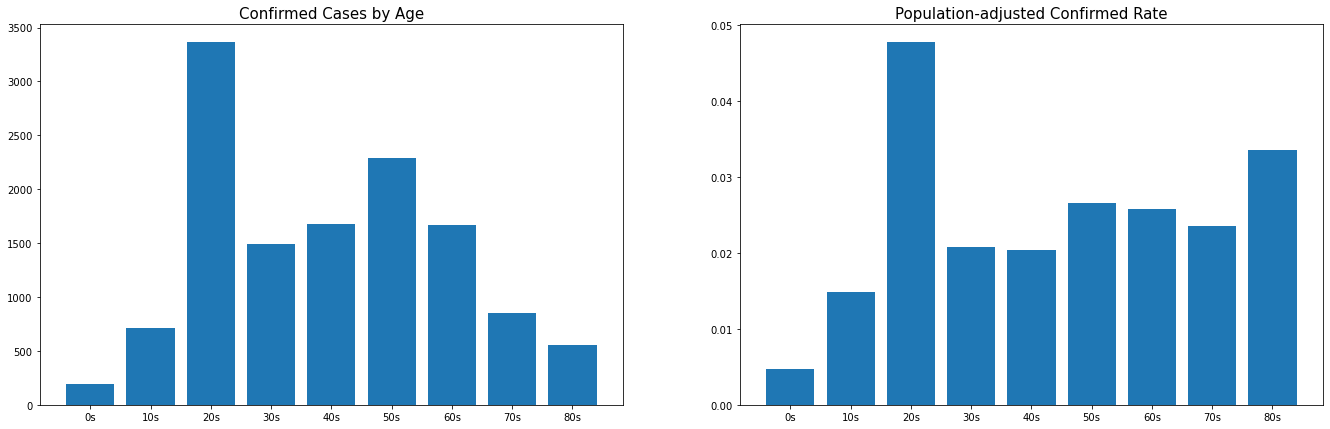

In [96]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(23, 7)) #1행 2열의 도화지를 생성

## 1. Confirmed Cases by Age
ax[0].set_title('Confirmed Cases by Age', fontsize=15)
ax[0].bar(age_list, confirmed_by_population.confirmed)

## 2. Population-adjusted Confirmed Rate
ax[1].set_title('Population-adjusted Confirmed Rate', fontsize=15)
ax[1].bar(age_list, confirmed_by_population.confirmed_ratio)

plt.show() 

다음 두개의 플랏을 보면 앞선 그래프에서는 20대의 확진 확률이 다른 연령대에 비해서 앞도적으로 높았지만 인구의 비율에 따른 확진의 비율을 나타내는 두번째 플랏을 보면 아직도 20대가 다른 연령대에 비해서 높기는 하지만 첫번째 그래프에 비해서는 조금은 낮아진 모습과 60~80대까지 연령층의 비중이 조금은 증가 했다는 사실을 두개의 플랏을 비교하면서 알 수있습니다
따라서 저는 다른 연령에 비해 압도적으로 많은 확진 비율을 가지고 있는 20대에 대해서 집중적으로 분석을 해보도록 하겠습니다.

##### 주제1 - 연령대별 확진 경로 <a class="anchor" id="section_2_1_3"></a>

In [97]:
patientinfo.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [98]:
patientinfo['infection_case'] = patientinfo['infection_case'].astype(str).apply(lambda x:x.split()[0])
#PatientInfo['infection_case']
infectionCase = patientinfo.pivot_table(index='infection_case',columns='age',
values='patient_id',aggfunc="count")
#infectionCase
#전체 감염 케이스
patientTotal = infectionCase.fillna(0).sum(axis=1)
patientTotal = patientTotal.sort_values(ascending = False)[:5]
# 20대 감염 케이스
patient20s = infectionCase['20s'].dropna()
patient20sTop = patient20s.sort_values(ascending=False)[:5]

In [99]:
display(patientTotal)
display(patient20sTop)

infection_case
contact     1112.0
nan          827.0
overseas     653.0
etc          638.0
Guro-gu      112.0
dtype: float64

infection_case
overseas       269.0
nan            221.0
contact        172.0
etc            127.0
Shincheonji     41.0
Name: 20s, dtype: float64

In [100]:
fig = go.Figure()
fig.add_trace(go.Pie(labels=patientTotal.index, values=patientTotal.values,
                     textinfo='label+percent'))

fig.update_layout(title='Confirmed infection case Total AGe')

fig.show()

전체 연령측의 감염원인에 대해서 본다면 접촉에 의한 확진이 33% 해외 입국이 19% 그외 nan과 etc가 각각 24,19%의 비율을 차지하고 있다

In [101]:
fig = go.Figure()
fig.add_trace(go.Pie(labels=patient20sTop.index, values=patient20sTop.values,
                     textinfo='label+percent'))

fig.update_layout(title='Confirmed infection case 20s AGe')

fig.show()

20대 연령의 그룹은 전체연령에 비해 해외입국과 nan이 각각 32 26%를 차지 하고 있다. 그러나 해당 데이터에는 원인을 알수 없는 nan데이가 전체의 1/4가량을 차지 하기 때문에 정확한 분석을 하기 어렵다

그렇다면 확진된 20대가 많이 돌아다닌 장소에 대해서 patientinfo 데이터를 이용해서 찾아보겠습니다

In [102]:
patientroute = pd.read_csv(path+'PatientRoute.csv')

In [103]:
patientroute.head()

,patient_id,global_num,date,province,city,type,latitude,longitude
0,1000000001,2.0,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.615246,126.715632
1,1000000001,2.0,2020-01-24,Seoul,Jung-gu,hospital,37.567241,127.005659
2,1000000002,5.0,2020-01-25,Seoul,Seongbuk-gu,etc,37.592560,127.017048
3,1000000002,5.0,2020-01-26,Seoul,Seongbuk-gu,store,37.591810,127.016822
4,1000000002,5.0,2020-01-26,Seoul,Seongdong-gu,public_transportation,37.563992,127.029534


In [104]:
patientroute[['patient_id','date','type']] #필요한 컬럼만 선택

,patient_id,date,type
0,1000000001,2020-01-22,airport
1,1000000001,2020-01-24,hospital
2,1000000002,2020-01-25,etc
3,1000000002,2020-01-26,store
4,1000000002,2020-01-26,public_transportation
...,...,...,...
6709,6100000090,2020-03-24,airport
6710,6100000090,2020-03-24,airport
6711,6100000090,2020-03-25,store
6712,6100000090,2020-03-25,hospital


In [105]:
places = patientroute.type.unique()
simproute = patientroute[['patient_id','date','type']]
agedf = patientinfo[['patient_id','age']]
simproutewage = pd.merge(simproute,agedf,how='left')
fiplot = simproutewage.set_index('type')
fiplot_count = fiplot.groupby('type').count().patient_id.sort_values()

In [106]:
fig = fiplot_count.iplot(asFigure = True, kind='bar')
fig.show()

해당 그래프는 전체 연령의 확진 원인에 대한 것을 카운트 시킨 결과로 etc와 hospital이 가장 많은 것을 보이나 병원은 확진자가 이상증세를 느끼고 찾아가는 당연한 경로이므로 제외를 하고 etc 또한 어느 곳에 다녀왔는지 정확하게 알 수 없어서 제외를 하고 다시 진행을 해보겠습니다.

In [107]:
twtfi = fiplot[fiplot.age == '20s']
untwtfi = fiplot[fiplot.age != '20s']
twt = twtfi.groupby('type').count().patient_id
untwt = untwtfi.groupby('type').count().patient_id
twt = twt[~twt.index.isin( ['etc','hospital'])]
untwt = untwt[~untwt.index.isin( ['etc','hospital'])]
fig = go.Figure()
fig.add_trace(go.Bar(x = twt.index, 
                     y = twt,
                     name = '20s',
                     marker_color='indianred'))
fig.add_trace(go.Bar(x = untwt.index, 
                     y = untwt,
                     name = 'except 20s',
                     marker_color='lightsalmon'))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

다음 그래프는 20대와 그외의 연령층이 확진된 원인에 대한것으로 앞서 말한것 처럼 etc와 hospital은 가장 많은 비율을 차지 하지만 분석을 하는데 크게 도움이 되지 않는다고 판단을 하여 제외를 하고 진행을 한 결과 이다. 

공통적으로 많이 방문하는 store과 church는 비슷한 양상을 보여주고 있습니다. 하지만, 20대는 restaurant, pc방, cafe, bar 등에서 훨씬 많은 방문비율을 확인할 수 있었습니다.

#### 주제2 - 코로나는 누구에게 가장 치명적인가 <a class="anchor" id="section_2_2"></a>

##### 주제2 - 연령별로 확진자의 치명률 <a class="anchor" id="section_2_2_1"></a>

In [108]:
time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [109]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=time['date'], y=time['deceased'],
                    mode='lines', # Line plot만 그리기
                    name='사망(deceased)'))

fig.update_layout(title='시간의 흐름에 따른 확진자 사망 추이',
                   xaxis_title='Date',
                   yaxis_title='Number')

fig.show()

해당 그래프는 시간의 흐름에 따른 확진자의 사망 추이로서 2020년 3월 부터 계속해서 우상향하는 모습을 볼 수 있다

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



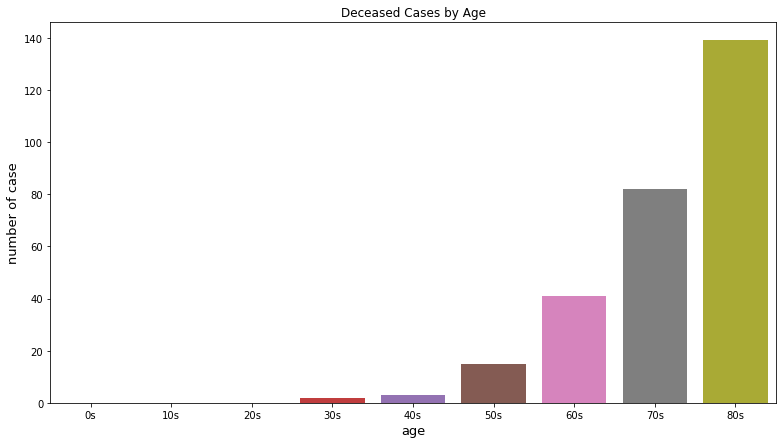

In [110]:
fig, ax = plt.subplots(figsize = (13,7)) #도화지(Figure : fig)를 깔고 그래프를 그릴 구역(Axes : ax)을 정의합니다. figsize를 통해서 도화지의 크기를 지정해준다
#이는 objection oriented API으로 그래프의 각 부분을 객체로 지정하고 그리는 유형이다
sns.barplot(age_list,timeage.deceased[-9:])
ax.set_xlabel('age',size=13) #연령
ax.set_ylabel('number of case',size=13) #케이스의 횟수
plt.title('Deceased Cases by Age')
plt.show()

나이가 많아질수록 사망자의 비율이 높다 과연 나이가 많아질수록 인구수가 많아져서 이러한 현상이 나오는 지 인구 비율에 따른 사망자에 대해서 다시 한번 살펴보자

In [111]:
confirmed_by_population = age_order.sort_values('age')
confirmed_by_population['deceased'] = list(timeage[-9:].deceased)

# 2. Get confirmed ratio regarding population
confirmed_by_population['deceased_ratio'] = confirmed_by_population['deceased']/confirmed_by_population['population'] *100
display(confirmed_by_population)

,age,population,proportion,deceased,deceased_ratio
1,0s,4054901,7.86,0,0.000000
2,10s,4769187,9.24,0,0.000000
3,20s,7037893,13.64,0,0.000000
4,30s,7174782,13.90,2,0.000028
5,40s,8257903,16.00,3,0.000036
6,50s,8575336,16.62,15,0.000175
7,60s,6476602,12.55,41,0.000633
8,70s,3598811,6.97,82,0.002279
9,80s,1657942,3.21,139,0.008384


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



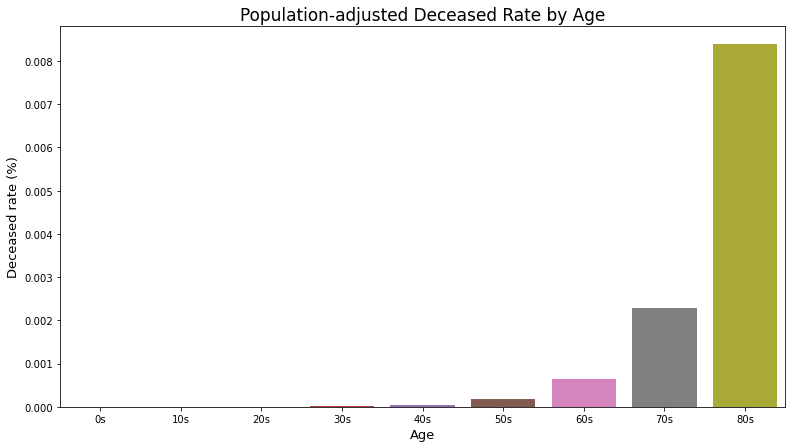

In [112]:
## 3. Plot confirmed rate by age
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Population-adjusted Deceased Rate by Age', fontsize=17)
sns.barplot(age_list, confirmed_by_population.deceased_ratio[-9:])
ax.set_xlabel('Age', size=13)
ax.set_ylabel('Deceased rate (%)', size=13)
plt.show() #인구 비율에 따른 확진 확률

인구 비율에 따른 사망자의 비율을 살펴본 결과이다 0~20대 까지는 사망자는 없으며 30대부터 확진으로 인한 사망자가 존재한다. 그러나 80대 이상의 연령층의 경우는 가장 많은 인구수를 가진 연령층도 아니지만 사망자의 비중이 가장 높은 것을 볼 수 있다. 이로 코로나 바이러스는 고연령층 일수록 가장 치명적인 질병임을 예측할 수 있다.

그렇다면 고연령층의 확진 원인에 대해서 알아보자

##### 주제2 - 연령대의 확진 원인 <a class="anchor" id="section_2_2_2"></a>

In [113]:
aged_pat = patientinfo[(patientinfo['age'] == '60s')|(patientinfo['age'] == '70s')|
                (patientinfo['age'] == '80s')][['province','age','infection_case']]
                
aged_inf = pd.DataFrame(aged_pat['infection_case'].value_counts())
#고연령측의 확진 원인

In [114]:
patientinfo['infection_case'] = patientinfo['infection_case'].astype(str).apply(lambda x:x.split()[0])
#PatientInfo['infection_case']
infectionCase = patientinfo.pivot_table(index='infection_case',columns='age',
values='patient_id',aggfunc="count")
#infectionCase
#전체 감염 케이스
patientTotal = infectionCase.fillna(0).sum(axis=1)
patientTotal = patientTotal.sort_values(ascending = False)[:5]
# 60대 감염 케이스
patient60s = infectionCase['60s'].dropna()
patient60sTop = patient60s.sort_values(ascending=False)[:5]
# 70대 감염 케이스
patient70s = infectionCase['70s'].dropna()
patient70sTop = patient70s.sort_values(ascending=False)[:5]
# 80대 감염 케이스
patient80s = infectionCase['80s'].dropna()
patient80sTop = patient80s.sort_values(ascending=False)[:5]

In [115]:
fig = go.Figure()
fig.add_trace(go.Pie(labels=patient60sTop.index, values=patient60sTop.values,
                     textinfo='label+percent'))

fig.update_layout(title='Confirmed infection case 60s AGe')

fig.show()

In [116]:
fig = go.Figure()
fig.add_trace(go.Pie(labels=patient70sTop.index, values=patient70sTop.values,
                     textinfo='label+percent'))

fig.update_layout(title='Confirmed infection case 70s AGe')

fig.show()

In [117]:
fig = go.Figure()
fig.add_trace(go.Pie(labels=patient80sTop.index, values=patient80sTop.values,
                     textinfo='label+percent'))

fig.update_layout(title='Confirmed infection case 80s AGe')

fig.show()

60,70,80대의 확진 원인을 보니 nan과 etc가 많기는 하지만 다른 연령대에 비해서 contact가 많다는 사실을 알수 있다. 그래도 nan과 etc가 많아 확진의 주요 원인을 접촉에 의해서 라고 단정할 수는 없다


그렇다면 나이가 많은 사람들은 완치 기간이 길어서 치명률이 높은 것이지 이에 대한 관계에 대해 알아보았습니다

##### 주제2 - 연령대별 회복기간 <a class="anchor" id="section_2_2_3"></a>

In [118]:
patientinfo

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


In [119]:
from datetime import datetime

In [120]:
pat_rel = patientinfo[['age','confirmed_date','released_date']]
#pat_rel['diff'] = pat_rel.released_date - pat_rel.confirmed_date
str(pat_rel.confirmed_date)
pat_rel.released_date = pd.to_datetime(pat_rel['released_date'], format='%Y %m %d')
pat_rel.confirmed_date = pd.to_datetime(pat_rel['confirmed_date'], format='%Y %m %d')
pat_rel['diff'] = pat_rel.released_date - pat_rel.confirmed_date
pat_rel = pat_rel[:5161] #격리 날짜 없는 것 삭제
display(pat_rel)

,age,confirmed_date,released_date,diff
0,50s,2020-01-23,2020-02-05,13 days
1,30s,2020-01-30,2020-03-02,32 days
2,50s,2020-01-30,2020-02-19,20 days
3,20s,2020-01-30,2020-02-15,16 days
4,20s,2020-01-31,2020-02-24,24 days
...,...,...,...,...
5156,30s,2020-04-03,2020-05-19,46 days
5157,20s,2020-04-03,2020-05-05,32 days
5158,10s,2020-04-14,2020-04-26,12 days
5159,30s,2020-05-09,2020-06-12,34 days


In [121]:
display(pat_rel['diff'].mean()) 
display(pat_rel['diff'].min()) 
display(pat_rel['diff'].max()) 


Timedelta('24 days 17:48:39.041614123')

Timedelta('0 days 00:00:00')

Timedelta('114 days 00:00:00')

평균 완치일은 24일 

최대 완치일은 114일 입니다.

In [122]:
pat_rel['over_avg'] = np.where(pat_rel['diff']>'24 days 17:48:39.041614123',1,0)
over_av_released = pat_rel[pat_rel['over_avg']==1]
under_av_released = pat_rel[pat_rel['over_avg']==0]

over_av=pd.DataFrame(over_av_released['age'].value_counts().sort_index()).reset_index()
under_av=pd.DataFrame(under_av_released['age'].value_counts().sort_index()).reset_index()

#연령대층별로 감염자수가 확연히 다르기때문에 각 연령층별의 비율로 계산
under_av['per']=under_av['age']/(under_av['age']+over_av['age']) 
over_av['per']=over_av['age']/(under_av['age']+over_av['age'])

#컬럼 재정리
under_av.columns=['age', 'count', 'under_per']
over_av.columns=['age', 'count', 'over_per']

In [123]:
over_av = pd.DataFrame({'age':['0s','10s','20s','30s','40s','50s','60s','70s','80s','90s'],
                             'count':[7,20,156,90,86,119,90,46,39,8],
                             'over_per':[0.106061,0.006289,0.026212,0.264856,0.172414,0.135647,0.232877,0.326087,0.2598887,0.487500]})


In [124]:
fig = go.Figure()

fig.add_trace(go.Bar(x=under_av.under_per, y=under_av.age, name='빠른 완치 기간',
                     orientation='h'))

fig.add_trace(go.Bar(x=over_av.over_per, y=over_av.age, name='오랜 완치 기간',
                     text=over_av.over_per, texttemplate='%{x:.1%}', textposition='inside',
                    textfont=dict(color='white'),
                    orientation='h'))
fig.update_layout(barmode='stack',
                  paper_bgcolor='rgb(248, 248, 255)',
                  plot_bgcolor='rgb(248, 248, 255)',
                 )
fig.update_layout(title='연령대에 따른 회복 기간')

fig.show()

그래프를 본다면 0~20대의 연령츠은 10% 미만으로 평균보다 빠른 완치 기간을 가지고 있음을 알 수 있습니다. 고연령층인 70,80,90대의 경우 32,26,48%로 다른 연령층에 비해서 높기는 하지만 과반을 넘지 않기에 고연령층이라고 모두가 장기간의 회복 기간을 가진다고 판단하기 어렵습니다. 

#### 주제3 - 정부의 정책은 타당했는가? <a class="anchor" id="section_2_3"></a>

##### 주제3 - 감염병 경보 단계 공표 시점 <a class="anchor" id="section_2_3_1"></a>

In [125]:
policy.head()

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN


In [126]:
policy.isna().sum() #여기서 end_date의 NA값이 너무 많은 것을 알 수 있다. 따라서 기점을 start_date로 지정하고 사용을 하겠다.

policy_id      0
country        0
type           0
gov_policy     0
detail         2
start_date     0
end_date      37
dtype: int64

In [127]:
policy_alerts = policy[policy.type == 'Alert']
display(policy_alerts)

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN


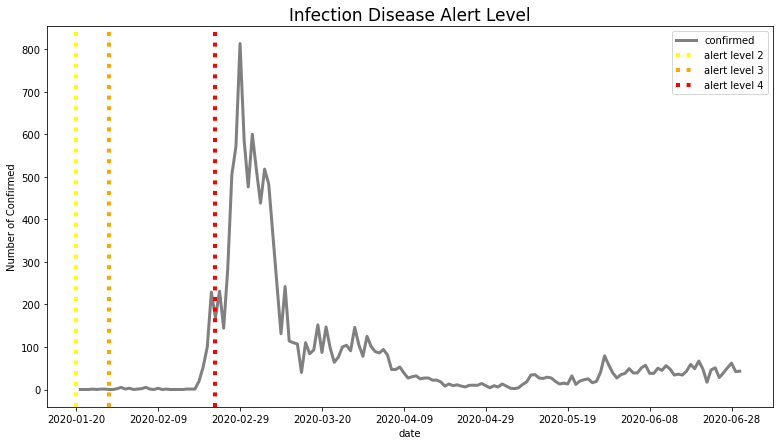

In [128]:
fig, ax = plt.subplots(figsize=(13,7))
plt.title("Infection Disease Alert Level",size=17)
plt.plot(time.date.unique(), time.confirmed.diff(),
         color = 'gray', lw = 3)
ax.set_xticks(ax.get_xticks()[::int(len(time.date.unique())/8)])

for day, color in zip(policy_alerts.start_date.values[1:], ['yellow','orange','red']):
    ax.axvline(day, ls=':', color=color, lw=4)
ax.legend(['confirmed','alert level 2','alert level 3','alert level 4'])
plt.xlabel('date')
plt.ylabel('Number of Confirmed')
plt.show()

다음은 감염병의 경보 단계 별로 해당 시점과 확진자의 일일 추이를 나타낸 것으로 2,3단계는 발생을 하고 국내에 들어온 시점에 공표가 되었고 가장 강력한 단계인 4단계는 일일 확진자가 정점에 이르기 전에 공표가 된 사실을 알수 있습니다.

그렇다면 정부의 거리두기는 어떠하였는지 알아보겠습니다.

##### 주제3 - 정부의 거리두기 공표 시점 <a class="anchor" id="section_2_3_2"></a>

In [129]:
policy_social = policy[policy.type == 'Social'][:-1]
display(policy_social)

,policy_id,country,type,gov_policy,detail,start_date,end_date
28,29,Korea,Social,Social Distancing Campaign,Strong,2020-02-29,2020-03-21
29,30,Korea,Social,Social Distancing Campaign,Strong,2020-03-22,2020-04-19
30,31,Korea,Social,Social Distancing Campaign,Weak,2020-04-20,2020-05-05
31,32,Korea,Social,Social Distancing Campaign,Weak(1st),2020-05-06,NaN


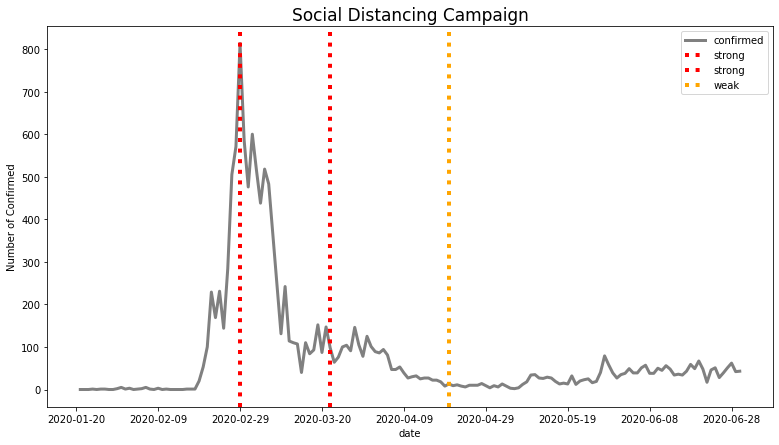

In [130]:
fig, ax = plt.subplots(figsize=(13,7))
plt.title("Social Distancing Campaign",size=17)
plt.plot(time.date.unique(), time.confirmed.diff(),
         color = 'gray', lw = 3)
ax.set_xticks(ax.get_xticks()[::int(len(time.date.unique())/8)])

for day, color in zip(policy_social.start_date.values[:], ['red','red','orange']):
    ax.axvline(day, ls=':', color=color, lw=4)
ax.legend(['confirmed','strong','strong','weak'])
plt.xlabel('date')
plt.ylabel('Number of Confirmed')
plt.show()

3월 23일에 감염병 경고가 4단계 발표 되고 나서 3월 29일부터 사회적 거리두기를 진행 하였습니다. 두번의 강한 거리두기를 유지하고 4월 20일부터 거리두기의 단계를 낮췄습니다. 거리두기를 확진자의 정점에 다다르는 시점에서 발표하고 그 이후 감소하는 일일 확진자의 수를 확인할 수 있다 따라서 분석을 하고 있는 해당 기간 동안은 정부의 방역 정책은 성공을 했다고 할 수 있다 

### 결론 <a class="anchor" id="chapter3"></a>

- 20대가 분석 기간동안 가장 많이 확진이 된 연령층이었으며, 20대의 인구수가 다른 연령층에 비해서 많아서가 아닌 다른 연령층에 비해서 활동 반경이 넓고 활발하며 불필요한 방문 지역과 장소에 자주 방문을 하였기 때문에 20대가 가장 많이 확진된 연령층이라는 결론을 내렸습니다.

- 코로나 바이러스는 고연령층이 될수록 더욱 치명적이라는 사실을 얻었습니다. 치명률이 인구 대비 비율로 살펴보아도 80대 이상이 가장 압도적으로 많았고 60,70대 또한 적지 않은 치명률을 가지고 있음을 알게 되었으며, 완치까지 걸리는 기간은 고연령층일수록 저연령층에 비해서 평균 이상으로 오래 걸리기는 하였으나 과반이상이거나 다른 연령층에 비해서 조금은 많치만 크게 상관성이 있어보지는 않았습니다.

- 정부의 거리두기는 당시 신천지로 인해서 일일 확진자가 800명 가량 나오던 시점에 공표되고 그 이후로 분석기간 동안에는 감소세를 보였습니다. 이로 정부의 거리두기는 적어도 당시에는 타당했다라는 결론을 내리게 되었습니다.

코로나 종식 및 예방을 위해서는 해외 유입에 의한 확진자를 차단해야합니다. 현재 입국자에 대한 검사 및 2주 자가격리 등 많은 노력이 진행되고 있습니다. 하지만, 그럼에도 유의사항을 잘 따르지 않는 일부 인원에 의해서 신천지와 같은 큰 집단 감염이 발생될 수 있다는 사실을 잊지 말아야합니다. 따라서, 코로나에 대한 경각심과 인식을 잘 심어주어야하며, 특히나 가장 안일하게 생각하는 20대의 인식 변화를 이끌어야 할 것입니다. 또한, 20대의 행동 패턴 및 방문 경로를 바탕으로 감염 위험이 있는 업종은 특히나 더욱 신경써서 사회적 거리두기, 마스크 착용, 손세정제와 손씻기 등을 더욱 권장하도록 해야합니다.

분석을 하면서 느낀 한계점은 자료에 etc나 NaN으로 표시된 자료의 형태가 많아서 정확한 원인들을 찾기에 어려움이 있었습니다.

자료 출처 및 참고 출처
- https://dacon.io/competitions/official/235590/overview/description (데이콘 - 코로나 데이터 시각화 AI 경진대회)
- https://www.kaggle.com/datasets/kimjihoo/coronavirusdataset (kaggle - Data Science for COVID-19 in South Korea)
- https://chancoding.tistory.com/119 (plotly line plot)
- https://plotly.com/python/pie-charts/(about pie plot)